In [1]:
import sys
sys.path.append("../")  # 确保根目录在 sys.path 中
from PIL import Image
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import postProcess as PostProcess

In [3]:
# 读取图像为灰度模式
image = Image.open("../../application/hard_mask_KLA.jpg").convert("L")
# 转换为 NumPy 数组
HardMasK = np.array(image)
# print(HardMasK)

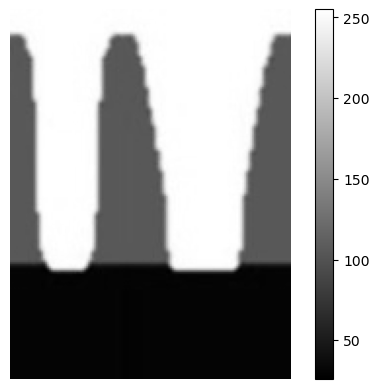

In [4]:
plt.imshow(HardMasK, cmap="gray")  # 指定灰度色彩映射
plt.colorbar()  # 显示颜色条（可选）
# plt.title("Grayscale Image")
plt.axis("off")  # 不显示坐标轴
plt.show()

In [5]:
# Hard mask
film = np.zeros((35, HardMasK.shape[1], HardMasK.shape[0], 5), dtype=np.int32)
density = 20
for i in range(HardMasK.shape[1]):
    for j in range(HardMasK.shape[0]):
        if HardMasK[j, i] < 80: # Si
            film[:, i, -j, 0] = density
        if HardMasK[j, i] >= 80 and HardMasK[j, i] < 120: # HM
            film[:, i, -j, -1] = density

In [6]:
film.shape

(35, 144, 190, 5)

In [7]:
# film[:, :, :450, -1] = 0
film[:, :, :60, -1] = 0
film[:, :, :2, -1] = density

In [8]:
import reaction_parallel_cython

In [10]:
a = reaction_parallel_cython.build_cell_from_film(film, 10, 10, 10)

In [15]:
a[0][0][0]

{'id': 0,
 'index': [0, 0, 0],
 'film': [0, 0, 0, 0, 0],
 'normal': [0.0, 0.0, 0.0]}

In [8]:
color_names = ['dimgray', 'blue', 'red', 'green','cyan', 'black', 'white','yellow', 'brown', 'magenta', 'orange', 'purple', 'pink', 'gray']
labels = ['Si', 'SiCl1', 'SiCl2', 'SiCl3', 'mask']
PostProcess.PostProcess_multiLayer(film, colors=color_names, labels=labels)

/home/ysy/.local/lib/python3.10/site-packages/pyvista/core/utilities/points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:44763/index.html?ui=P_0x7f9a130e0790_0&reconnect=auto" class="pyvi…